<a href="https://colab.research.google.com/github/angelabaltes/FindmyFigurine/blob/main/findmyfigurine_inceptionv3_animefaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, optimizers
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/My Drive/Insight/moeimouto-faces

train_dir = '/content/drive/My Drive/Insight/moeimouto-faces/Train'
#validation_dir= '/content/drive/My Drive/Insight/rps/validation'
test_dir = '/content/drive/My Drive/Insight/moeimouto-faces/Test'

#!unzip moeimouto-faces.zip

In [ ]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
   height_shift_range=0.1,
   validation_split = 0.15) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255) 
  
train_generator = train_datagen.flow_from_directory( 
    train_dir, 
    target_size = (75,75),
    batch_size = 214,
    class_mode = 'categorical',
    subset='training') 
  
#validation_generator = test_datagen.flow_from_directory( 
#    validation_dir, 
#    target_size = (75,75),
#    batch_size = 37,
#    class_mode = 'categorical',
#    subset = 'validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(75,75),
    batch_size = 32,
    class_mode = 'categorical')

Found 9393 images belonging to 173 classes.
Found 3437 images belonging to 173 classes.


In [ ]:
# Inspect batch
sample_training_images, _ = next(train_generator)
label_map = (train_generator.class_indices)

In [ ]:
from glob import glob
class_names = glob("*") # Reads all the folders in which images are present
class_names = sorted(class_names) # Sorting them
name_id_map = dict(zip(class_names, range(len(class_names))))
print(label_map)

{'Aika Granzchesta': 0, 'Aisaka Taiga': 1, 'Akihime Sumomo': 2, 'Akiyama Mio': 3, 'Akizuki Ritsuko': 4, 'Alice Margatroid': 5, 'Allen Walker': 6, 'Amami Haruka': 7, 'Ana Coppola': 8, 'Andou Mahoro': 9, 'Arcueid Brunestud': 10, 'Asagiri Mai': 11, 'Asahina Mikuru': 12, 'Asakura Otome': 13, 'Asakura Yume': 14, 'Ayanami Rei': 15, 'Ayasaki Hayate': 16, 'Belldandy': 17, 'Black Rock Shooter': 18, 'C.C': 19, 'Canal Volphied': 20, 'Caro Ru Lushe': 21, 'Chii': 22, 'Cirno': 23, 'Corticarte Apa Lagranges': 24, 'Daidouji Tomoyo': 25, 'Enma Ai': 26, 'Erio Mondial': 27, 'Fate Testarossa': 28, 'Feena Fam Earthlight': 29, 'Flandre Scarlet': 30, 'Fujibayashi Kyou': 31, 'Fukuzawa Yumi': 32, 'Furude Rika': 33, 'Furukawa Nagisa': 34, 'Fuyou Kaede': 35, 'Golden Darkness': 36, 'Hakurei Reimu': 37, 'Hatsune Miku': 38, 'Hayama Mizuki': 39, 'Hayase Mitsuki': 40, 'Hiiragi Kagami': 41, 'Hiiragi Tsukasa': 42, 'Hinamori Amu': 43, 'Hirasawa Yui': 44, 'Horo': 45, 'Houjou Reika': 46, 'Houjou Satoko': 47, 'Ibuki Fuuko'

In [ ]:
# This function will plot images in the form of a grid with 1 row and 3 columns 
# where images are placed in each column
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

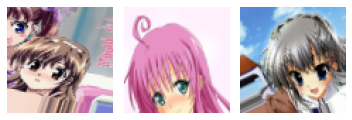

In [ ]:
plotImages(sample_training_images[:3])

In [ ]:

def model_output_for_TL (pre_trained_model, last_output):    
    x = Flatten()(last_output)
    
    # Dense hidden layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Output neuron. 
    x = Dense(173, activation='softmax')(x)
    
    model = Model(pre_trained_model.input, x)
    
    return model
pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
model_TL = model_output_for_TL(pre_trained_model, last_output)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model_TL.summary()


In [ ]:
model_TL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_TL = model_TL.fit(
      train_generator,
      steps_per_epoch=30,  
      epochs=90,
      verbose=1)
      #validation_data = validation_generator)
tf.keras.models.save_model(model_TL,'my_model.hdf7') 